In [4]:
import numpy as np
import pandas as pd
#import hyperopt
from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import re

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

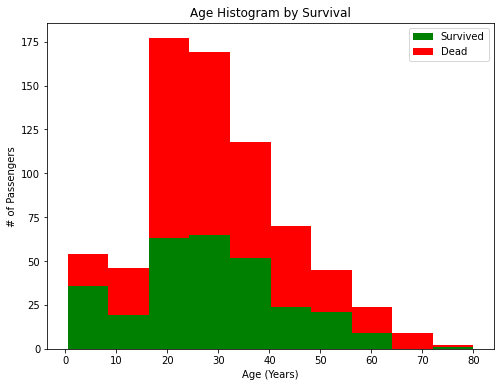

In [6]:
plt.figure(figsize=[8,6])

#plt.subplot(235)
plt.hist(x = [train_df[train_df['Survived']==1]['Age'], train_df[train_df['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

In [7]:
test_df['Cabin'] = test_df['Cabin'].str[0]
train_df['Cabin'] = train_df['Cabin'].str[0]

In [8]:
train_df.fillna(-999,inplace=True)
test_df.fillna(-999,inplace=True)

In [9]:
x = train_df.drop('Survived',axis=1)
y = train_df.Survived

In [10]:
x["Title"] = x["Name"].str.split(", ").str[1].str.split(" ").str[0]
test_df["Title"] = test_df["Name"].str.split(", ").str[1].str.split(" ").str[0]



x['Has_Cabin'] = x["Cabin"].map(lambda x: 1 - int(type(x) == float))
test_df['Has_Cabin'] = test_df["Cabin"].map(lambda x: 1 - int(type(x) == float))

In [11]:
cate_features_index = np.where(x.dtypes != float)[0]

In [15]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-999,S,Mr.,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs.,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-999,S,Miss.,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs.,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-999,S,Mr.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,-999,S,Rev.,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,Miss.,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-999.0,1,2,W./C. 6607,23.4500,-999,S,Miss.,1
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,Mr.,1


In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.85,random_state=1234)

In [11]:
model = CatBoostClassifier(eval_metric='Accuracy',
                           use_best_model=True,
                           random_seed=42,
                           #learning_rate=0.01,
                           #iterations=3000,
                           #l2_leaf_reg=3,
                           #random_strength=1,
                           #leaf_estimation_method='Newton',
                           #bagging_temperature=1,
                           #one_hot_max_size=2
                          )


In [12]:
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

Learning rate set to 0.029583
0:	learn: 0.7833554	test: 0.7835821	best: 0.7835821 (0)	total: 163ms	remaining: 2m 42s
1:	learn: 0.8084544	test: 0.7985075	best: 0.7985075 (1)	total: 185ms	remaining: 1m 32s
2:	learn: 0.8150594	test: 0.8582090	best: 0.8582090 (2)	total: 205ms	remaining: 1m 8s
3:	learn: 0.8203435	test: 0.8582090	best: 0.8582090 (2)	total: 217ms	remaining: 54s
4:	learn: 0.8269485	test: 0.8432836	best: 0.8582090 (2)	total: 233ms	remaining: 46.4s
5:	learn: 0.8295905	test: 0.8358209	best: 0.8582090 (2)	total: 247ms	remaining: 40.9s
6:	learn: 0.8216645	test: 0.8358209	best: 0.8582090 (2)	total: 263ms	remaining: 37.3s
7:	learn: 0.8335535	test: 0.8432836	best: 0.8582090 (2)	total: 281ms	remaining: 34.8s
8:	learn: 0.8269485	test: 0.8507463	best: 0.8582090 (2)	total: 291ms	remaining: 32.1s
9:	learn: 0.8243065	test: 0.8507463	best: 0.8582090 (2)	total: 300ms	remaining: 29.7s
10:	learn: 0.8282695	test: 0.8507463	best: 0.8582090 (2)	total: 314ms	remaining: 28.2s
11:	learn: 0.8335535	te

106:	learn: 0.8718626	test: 0.8656716	best: 0.8731343 (61)	total: 1.94s	remaining: 16.2s
107:	learn: 0.8718626	test: 0.8656716	best: 0.8731343 (61)	total: 1.96s	remaining: 16.2s
108:	learn: 0.8731836	test: 0.8656716	best: 0.8731343 (61)	total: 1.99s	remaining: 16.2s
109:	learn: 0.8718626	test: 0.8656716	best: 0.8731343 (61)	total: 2.01s	remaining: 16.2s
110:	learn: 0.8718626	test: 0.8656716	best: 0.8731343 (61)	total: 2.03s	remaining: 16.3s
111:	learn: 0.8705416	test: 0.8656716	best: 0.8731343 (61)	total: 2.04s	remaining: 16.2s
112:	learn: 0.8705416	test: 0.8656716	best: 0.8731343 (61)	total: 2.05s	remaining: 16.1s
113:	learn: 0.8731836	test: 0.8656716	best: 0.8731343 (61)	total: 2.06s	remaining: 16s
114:	learn: 0.8731836	test: 0.8656716	best: 0.8731343 (61)	total: 2.08s	remaining: 16s
115:	learn: 0.8731836	test: 0.8656716	best: 0.8731343 (61)	total: 2.1s	remaining: 16s
116:	learn: 0.8745046	test: 0.8656716	best: 0.8731343 (61)	total: 2.12s	remaining: 16s
117:	learn: 0.8745046	test: 0.

207:	learn: 0.8969617	test: 0.8582090	best: 0.8731343 (61)	total: 3.72s	remaining: 14.2s
208:	learn: 0.8969617	test: 0.8582090	best: 0.8731343 (61)	total: 3.72s	remaining: 14.1s
209:	learn: 0.8969617	test: 0.8582090	best: 0.8731343 (61)	total: 3.74s	remaining: 14.1s
210:	learn: 0.8969617	test: 0.8582090	best: 0.8731343 (61)	total: 3.76s	remaining: 14.1s
211:	learn: 0.8969617	test: 0.8582090	best: 0.8731343 (61)	total: 3.77s	remaining: 14s
212:	learn: 0.8969617	test: 0.8582090	best: 0.8731343 (61)	total: 3.79s	remaining: 14s
213:	learn: 0.8969617	test: 0.8582090	best: 0.8731343 (61)	total: 3.81s	remaining: 14s
214:	learn: 0.8969617	test: 0.8582090	best: 0.8731343 (61)	total: 3.83s	remaining: 14s
215:	learn: 0.8996037	test: 0.8582090	best: 0.8731343 (61)	total: 3.85s	remaining: 14s
216:	learn: 0.8996037	test: 0.8582090	best: 0.8731343 (61)	total: 3.86s	remaining: 13.9s
217:	learn: 0.8996037	test: 0.8582090	best: 0.8731343 (61)	total: 3.88s	remaining: 13.9s
218:	learn: 0.8996037	test: 0.8

310:	learn: 0.9167768	test: 0.8582090	best: 0.8731343 (61)	total: 5.61s	remaining: 12.4s
311:	learn: 0.9180978	test: 0.8582090	best: 0.8731343 (61)	total: 5.63s	remaining: 12.4s
312:	learn: 0.9180978	test: 0.8582090	best: 0.8731343 (61)	total: 5.65s	remaining: 12.4s
313:	learn: 0.9180978	test: 0.8582090	best: 0.8731343 (61)	total: 5.67s	remaining: 12.4s
314:	learn: 0.9180978	test: 0.8582090	best: 0.8731343 (61)	total: 5.7s	remaining: 12.4s
315:	learn: 0.9180978	test: 0.8582090	best: 0.8731343 (61)	total: 5.71s	remaining: 12.4s
316:	learn: 0.9180978	test: 0.8656716	best: 0.8731343 (61)	total: 5.74s	remaining: 12.4s
317:	learn: 0.9194188	test: 0.8656716	best: 0.8731343 (61)	total: 5.75s	remaining: 12.3s
318:	learn: 0.9207398	test: 0.8656716	best: 0.8731343 (61)	total: 5.76s	remaining: 12.3s
319:	learn: 0.9207398	test: 0.8656716	best: 0.8731343 (61)	total: 5.79s	remaining: 12.3s
320:	learn: 0.9207398	test: 0.8656716	best: 0.8731343 (61)	total: 5.81s	remaining: 12.3s
321:	learn: 0.9207398	

406:	learn: 0.9260238	test: 0.8507463	best: 0.8731343 (61)	total: 7.63s	remaining: 11.1s
407:	learn: 0.9260238	test: 0.8507463	best: 0.8731343 (61)	total: 7.65s	remaining: 11.1s
408:	learn: 0.9260238	test: 0.8507463	best: 0.8731343 (61)	total: 7.67s	remaining: 11.1s
409:	learn: 0.9273448	test: 0.8507463	best: 0.8731343 (61)	total: 7.68s	remaining: 11.1s
410:	learn: 0.9273448	test: 0.8432836	best: 0.8731343 (61)	total: 7.7s	remaining: 11s
411:	learn: 0.9273448	test: 0.8507463	best: 0.8731343 (61)	total: 7.72s	remaining: 11s
412:	learn: 0.9273448	test: 0.8507463	best: 0.8731343 (61)	total: 7.74s	remaining: 11s
413:	learn: 0.9273448	test: 0.8507463	best: 0.8731343 (61)	total: 7.76s	remaining: 11s
414:	learn: 0.9273448	test: 0.8507463	best: 0.8731343 (61)	total: 7.79s	remaining: 11s
415:	learn: 0.9273448	test: 0.8507463	best: 0.8731343 (61)	total: 7.82s	remaining: 11s
416:	learn: 0.9273448	test: 0.8507463	best: 0.8731343 (61)	total: 7.84s	remaining: 11s
417:	learn: 0.9273448	test: 0.850746

502:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.74s	remaining: 9.63s
503:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.77s	remaining: 9.61s
504:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.79s	remaining: 9.6s
505:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.81s	remaining: 9.57s
506:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.83s	remaining: 9.56s
507:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.85s	remaining: 9.54s
508:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.87s	remaining: 9.52s
509:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.89s	remaining: 9.5s
510:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.9s	remaining: 9.48s
511:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.92s	remaining: 9.46s
512:	learn: 0.9339498	test: 0.8507463	best: 0.8731343 (61)	total: 9.94s	remaining: 9.44s
513:	learn: 0.9339498	te

602:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.7s	remaining: 7.69s
603:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.7s	remaining: 7.67s
604:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.7s	remaining: 7.65s
605:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.7s	remaining: 7.63s
606:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.8s	remaining: 7.61s
607:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.8s	remaining: 7.59s
608:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.8s	remaining: 7.57s
609:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.8s	remaining: 7.55s
610:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.8s	remaining: 7.53s
611:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.8s	remaining: 7.51s
612:	learn: 0.9405548	test: 0.8507463	best: 0.8731343 (61)	total: 11.9s	remaining: 7.5s
613:	learn: 0.9405548	

697:	learn: 0.9471598	test: 0.8507463	best: 0.8731343 (61)	total: 13.8s	remaining: 5.96s
698:	learn: 0.9471598	test: 0.8507463	best: 0.8731343 (61)	total: 13.8s	remaining: 5.95s
699:	learn: 0.9471598	test: 0.8507463	best: 0.8731343 (61)	total: 13.8s	remaining: 5.92s
700:	learn: 0.9471598	test: 0.8507463	best: 0.8731343 (61)	total: 13.8s	remaining: 5.91s
701:	learn: 0.9471598	test: 0.8507463	best: 0.8731343 (61)	total: 13.9s	remaining: 5.89s
702:	learn: 0.9471598	test: 0.8507463	best: 0.8731343 (61)	total: 13.9s	remaining: 5.87s
703:	learn: 0.9484808	test: 0.8507463	best: 0.8731343 (61)	total: 13.9s	remaining: 5.85s
704:	learn: 0.9484808	test: 0.8507463	best: 0.8731343 (61)	total: 13.9s	remaining: 5.83s
705:	learn: 0.9484808	test: 0.8507463	best: 0.8731343 (61)	total: 14s	remaining: 5.81s
706:	learn: 0.9484808	test: 0.8507463	best: 0.8731343 (61)	total: 14s	remaining: 5.79s
707:	learn: 0.9484808	test: 0.8507463	best: 0.8731343 (61)	total: 14s	remaining: 5.78s
708:	learn: 0.9484808	test:

798:	learn: 0.9511229	test: 0.8507463	best: 0.8731343 (61)	total: 15.9s	remaining: 4.01s
799:	learn: 0.9498018	test: 0.8507463	best: 0.8731343 (61)	total: 16s	remaining: 3.99s
800:	learn: 0.9498018	test: 0.8507463	best: 0.8731343 (61)	total: 16s	remaining: 3.97s
801:	learn: 0.9498018	test: 0.8507463	best: 0.8731343 (61)	total: 16s	remaining: 3.95s
802:	learn: 0.9498018	test: 0.8507463	best: 0.8731343 (61)	total: 16s	remaining: 3.93s
803:	learn: 0.9498018	test: 0.8507463	best: 0.8731343 (61)	total: 16s	remaining: 3.91s
804:	learn: 0.9511229	test: 0.8507463	best: 0.8731343 (61)	total: 16.1s	remaining: 3.89s
805:	learn: 0.9511229	test: 0.8507463	best: 0.8731343 (61)	total: 16.1s	remaining: 3.87s
806:	learn: 0.9511229	test: 0.8507463	best: 0.8731343 (61)	total: 16.1s	remaining: 3.85s
807:	learn: 0.9511229	test: 0.8507463	best: 0.8731343 (61)	total: 16.1s	remaining: 3.83s
808:	learn: 0.9511229	test: 0.8507463	best: 0.8731343 (61)	total: 16.1s	remaining: 3.81s
809:	learn: 0.9511229	test: 0.8

899:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18s	remaining: 2s
900:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18s	remaining: 1.98s
901:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18.1s	remaining: 1.96s
902:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18.1s	remaining: 1.94s
903:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18.1s	remaining: 1.92s
904:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18.1s	remaining: 1.9s
905:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18.1s	remaining: 1.88s
906:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18.2s	remaining: 1.86s
907:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18.2s	remaining: 1.84s
908:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18.2s	remaining: 1.82s
909:	learn: 0.9524439	test: 0.8507463	best: 0.8731343 (61)	total: 18.2s	remaining: 1.8s
910:	learn: 0.9524439	test: 0.

996:	learn: 0.9577279	test: 0.8507463	best: 0.8731343 (61)	total: 19.9s	remaining: 59.9ms
997:	learn: 0.9577279	test: 0.8507463	best: 0.8731343 (61)	total: 19.9s	remaining: 39.9ms
998:	learn: 0.9577279	test: 0.8507463	best: 0.8731343 (61)	total: 19.9s	remaining: 20ms
999:	learn: 0.9577279	test: 0.8507463	best: 0.8731343 (61)	total: 20s	remaining: 0us

bestTest = 0.8731343284
bestIteration = 61

Shrink model to first 62 iterations.


In [13]:
xtrain

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
848,849,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,-999,S,Rev.,1
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,-999,S,Mrs.,1
746,747,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,-999,S,Mr.,1
355,356,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,-999,S,Mr.,1
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B,-999,Miss.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,205,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,-999,S,Mr.,1
53,54,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,-999,S,Mrs.,1
294,295,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,-999,S,Mr.,1
723,724,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,-999,S,Mr.,1


In [14]:
predictions_3 = model.predict(xtest)
accuracy_score(ytest, predictions_3)

0.8731343283582089

In [15]:
0.8731343283582089

0.8731343283582089

In [16]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,-999,Q,Mr.,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,-999,S,Mrs.,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,-999,Q,Mr.,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,-999,S,Mr.,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,-999,S,Mrs.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-999.0,0,0,A.5. 3236,8.0500,-999,S,Mr.,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Dona.,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,-999,S,Mr.,1
416,1308,3,"Ware, Mr. Frederick",male,-999.0,0,0,359309,8.0500,-999,S,Mr.,1


In [17]:
pred = model.predict(test_df)
pred = pred.astype(np.int)
#test_df = pd.read_csv('test.csv')
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':pred})

In [18]:
submission.to_csv('catboost.csv',index=False)